In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan
from smyleutils import averaging_utils as avg
from smyleutils import histoplot_utils as histo
from smyleutils import bootstrap_utils as boot
from CASutils import bootstrap_utils as bootcas
from CASutils import linfit_utils as linfit
import sys

In [2]:
plotpath="/glade/campaign/cgd/cas/islas/python_plots/NCAR_CW3E_SMYLE/FIGURES/"

### Read in the data

In [3]:
basepath="/glade/campaign/cgd/cas/islas/python_savs/NCAR_CW3E_SMYLE/DATA_SORT/Uzm/"

high_sep=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init09.nc').Uzm
low_sep=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init09.nc').Uzm ; low_sep['lat'] = high_sep.lat
era5_sep=xr.open_dataset(basepath+'Uzm_ERA5_day_init09.nc').Uzm ; era5_sep['lat'] = high_sep.lat
jra_sep = xr.open_dataset(basepath+'Uzm_JRA3Q_day_init09.nc').Uzm ; jra_sep['lat'] = high_sep.lat

high_nov=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E-L83_day_init11.nc').Uzm
low_nov=xr.open_dataset(basepath+'Uzm_BSMYLE-CW3E_day_init11.nc').Uzm ; low_nov['lat'] = high_nov.lat
era5_nov=xr.open_dataset(basepath+'Uzm_ERA5_day_init11.nc').Uzm ; era5_nov['lat'] = high_nov.lat
jra_nov = xr.open_dataset(basepath+'Uzm_JRA3Q_day_init11.nc').Uzm ; jra_nov['lat'] = high_nov.lat

### Compute the monthly mean

In [4]:
high_sep_mon = high_sep.groupby('time.month').mean('time')
low_sep_mon = low_sep.groupby('time.month').mean('time')
era5_sep_mon = era5_sep.groupby('time.month').mean('time')
jra_sep_mon = jra_sep.groupby('time.month').mean('time')

high_nov_mon = high_nov.groupby('time.month').mean('time')
low_nov_mon = low_nov.groupby('time.month').mean('time')
era5_nov_mon = era5_nov.groupby('time.month').mean('time')
jra_nov_mon = jra_nov.groupby('time.month').mean('time')

### Remove the lead dependent climatology

In [5]:
high_sep_mon = high_sep_mon - high_sep_mon.mean('init_year')
low_sep_mon = low_sep_mon - low_sep_mon.mean('init_year')
era5_sep_mon = era5_sep_mon - era5_sep_mon.mean('init_year')
jra_sep_mon = jra_sep_mon - jra_sep_mon.mean('init_year')

high_nov_mon = high_nov_mon - high_nov_mon.mean('init_year')
low_nov_mon = low_nov_mon - low_nov_mon.mean('init_year')
era5_nov_mon = era5_nov_mon - era5_nov_mon.mean('init_year')
jra_nov_mon = jra_nov_mon - jra_nov_mon.mean('init_year')

### Pick out the 50 hPa level

In [6]:
high_sep_50 = high_sep_mon.interp(ilev=50)
low_sep_50 = low_sep_mon.interp(ilev=50)
era5_sep_50 = era5_sep_mon.sel(level=50)
jra_sep_50 = jra_sep_mon.sel(pre=50)

high_nov_50 = high_nov_mon.interp(ilev=50)
low_nov_50 = low_nov_mon.interp(ilev=50)
era5_nov_50 = era5_nov_mon.sel(level=50)
jra_nov_50 = jra_nov_mon.sel(pre=50)

### Pick out the 10 hPa level

In [7]:
high_sep_10 = high_sep_mon.interp(ilev=10)
low_sep_10 = low_sep_mon.interp(ilev=10)
era5_sep_10 = era5_sep_mon.sel(level=10)
jra_sep_10 = jra_sep_mon.sel(pre=10)

high_nov_10 = high_nov_mon.interp(ilev=10)
low_nov_10 = low_nov_mon.interp(ilev=10)
era5_nov_10 = era5_nov_mon.sel(level=10)
jra_nov_10 = jra_nov_mon.sel(pre=10)

### Compute the tropical average at 50 hPa

In [8]:
era5_sep_tr = avg.cosweightlat(era5_sep_50,-5,5)
high_sep_tr = avg.cosweightlat(high_sep_50,-5,5)
low_sep_tr = avg.cosweightlat(low_sep_50,-5,5)
jra_sep_tr = avg.cosweightlat(jra_sep_50, -5, 5)

era5_nov_tr = avg.cosweightlat(era5_nov_50,-5,5)
high_nov_tr = avg.cosweightlat(high_nov_50,-5,5)
low_nov_tr = avg.cosweightlat(low_nov_50,-5,5)
jra_nov_tr = avg.cosweightlat(jra_nov_50,-5,5)

DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat


### Grab out 60N at 10 hPa

In [9]:
era5_sep_pv = era5_sep_10.interp(lat=60)
high_sep_pv = high_sep_10.interp(lat=60)
low_sep_pv = low_sep_10.interp(lat=60)
jra_sep_pv = jra_sep_10.interp(lat=60)

era5_nov_pv = era5_nov_10.interp(lat=60)
high_nov_pv = high_nov_10.interp(lat=60)
low_nov_pv = low_nov_10.interp(lat=60)
jra_nov_pv = jra_nov_10.interp(lat=60)

### Calculate the correlations between them

In [10]:
era5_sep_cor = xr.corr(era5_sep_tr, era5_sep_pv, dim='init_year')
jra_sep_cor = xr.corr(jra_sep_tr, jra_sep_pv, dim='init_year')
high_sep_cor = xr.corr(high_sep_tr.mean('M'), high_sep_pv.mean('M'), dim='init_year')
low_sep_cor = xr.corr(low_sep_tr.mean('M'), low_sep_pv.mean('M'), dim='init_year')

era5_nov_cor = xr.corr(era5_nov_tr, era5_nov_pv, dim='init_year' )
jra_nov_cor = xr.corr(jra_nov_tr, jra_nov_pv, dim='init_year' )
high_nov_cor = xr.corr(high_nov_tr.mean('M'), high_nov_pv.mean('M'), dim='init_year')
low_nov_cor = xr.corr(low_nov_tr.mean('M'), low_nov_pv.mean('M'), dim='init_year')

### Calculate the single member bootstrapped ranges

In [11]:
boot_tr_high_nov=[] ; boot_pv_high_nov=[]
boot_tr_low_nov=[] ; boot_pv_low_nov=[]

boot_tr_high_sep=[] ; boot_pv_high_sep=[]
boot_tr_low_sep=[] ; boot_pv_low_sep=[]

boot_tr_high_nov_20=[] ; boot_pv_high_nov_20=[]
boot_tr_low_nov_20=[] ; boot_pv_low_nov_20=[]

boot_tr_high_sep_20=[] ; boot_pv_high_sep_20=[]
boot_tr_low_sep_20=[] ; boot_pv_low_sep_20=[]

for iyear in np.arange(0,high_nov_tr.init_year.size,1):
    boot_tr_nov = boot.bootgen(high_nov_tr.isel(init_year=iyear), nsamples=1, seed=iyear).isel(isample=0)
    boot_pv_nov = boot.bootgen(high_nov_pv.isel(init_year=iyear), nsamples=1, seed=iyear).isel(isample=0)
    boot_tr_high_nov.append(boot_tr_nov)
    boot_pv_high_nov.append(boot_pv_nov)
    
    boot_tr_nov = boot.bootgen(low_nov_tr.isel(init_year=iyear), nsamples=1, seed=iyear).isel(isample=0)
    boot_pv_nov = boot.bootgen(low_nov_pv.isel(init_year=iyear), nsamples=1, seed=iyear).isel(isample=0)
    boot_tr_low_nov.append(boot_tr_nov)
    boot_pv_low_nov.append(boot_pv_nov)
    
    boot_tr_sep = boot.bootgen(high_sep_tr.isel(init_year=iyear), nsamples=1, seed=iyear).isel(isample=0)
    boot_pv_sep = boot.bootgen(high_sep_pv.isel(init_year=iyear), nsamples=1, seed=iyear).isel(isample=0)
    boot_tr_high_sep.append(boot_tr_sep)
    boot_pv_high_sep.append(boot_pv_sep)
    
    boot_tr_sep = boot.bootgen(low_sep_tr.isel(init_year=iyear), nsamples=1, seed=iyear).isel(isample=0)
    boot_pv_sep = boot.bootgen(low_sep_pv.isel(init_year=iyear), nsamples=1, seed=iyear).isel(isample=0)
    boot_tr_low_sep.append(boot_tr_sep)
    boot_pv_low_sep.append(boot_pv_sep)
    
    boot_tr_nov_20 = boot.bootgen(high_nov_tr.isel(init_year=iyear), nsamples=20, seed=iyear).mean('isample')
    boot_pv_nov_20 = boot.bootgen(high_nov_pv.isel(init_year=iyear), nsamples=20, seed=iyear).mean('isample')
    boot_tr_high_nov_20.append(boot_tr_nov_20)
    boot_pv_high_nov_20.append(boot_pv_nov_20)
    
    boot_tr_nov_20 = boot.bootgen(low_nov_tr.isel(init_year=iyear), nsamples=20, seed=iyear).mean('isample')
    boot_pv_nov_20 = boot.bootgen(low_nov_pv.isel(init_year=iyear), nsamples=20, seed=iyear).mean('isample')
    boot_tr_low_nov_20.append(boot_tr_nov_20)
    boot_pv_low_nov_20.append(boot_pv_nov_20)
    
    boot_tr_sep_20 = boot.bootgen(high_sep_tr.isel(init_year=iyear), nsamples=20, seed=iyear).mean('isample')
    boot_pv_sep_20 = boot.bootgen(high_sep_pv.isel(init_year=iyear), nsamples=20, seed=iyear).mean('isample')
    boot_tr_high_sep_20.append(boot_tr_sep_20)
    boot_pv_high_sep_20.append(boot_pv_sep_20)
    
    boot_tr_sep_20 = boot.bootgen(low_sep_tr.isel(init_year=iyear), nsamples=20, seed=iyear).mean('isample')
    boot_pv_sep_20 = boot.bootgen(low_sep_pv.isel(init_year=iyear), nsamples=20, seed=iyear).mean('isample')
    boot_tr_low_sep_20.append(boot_tr_sep_20)
    boot_pv_low_sep_20.append(boot_pv_sep_20)
    
boot_tr_high_nov = xr.concat(boot_tr_high_nov, dim=high_nov_tr.init_year)
boot_pv_high_nov = xr.concat(boot_pv_high_nov, dim=high_nov_tr.init_year)
boot_tr_low_nov = xr.concat(boot_tr_low_nov, dim=low_nov_tr.init_year)
boot_pv_low_nov = xr.concat(boot_pv_low_nov, dim=low_nov_tr.init_year)

boot_tr_high_sep = xr.concat(boot_tr_high_sep, dim=high_sep_tr.init_year)
boot_pv_high_sep = xr.concat(boot_pv_high_sep, dim=high_sep_tr.init_year)
boot_tr_low_sep = xr.concat(boot_tr_low_sep, dim=low_sep_tr.init_year)
boot_pv_low_sep = xr.concat(boot_pv_low_sep, dim=low_sep_tr.init_year)

boot_tr_high_nov_20 = xr.concat(boot_tr_high_nov_20, dim=high_nov_tr.init_year)
boot_pv_high_nov_20 = xr.concat(boot_pv_high_nov_20, dim=high_nov_tr.init_year)
boot_tr_low_nov_20 = xr.concat(boot_tr_low_nov_20, dim=low_nov_tr.init_year)
boot_pv_low_nov_20 = xr.concat(boot_pv_low_nov_20, dim=low_nov_tr.init_year)

boot_tr_high_sep_20 = xr.concat(boot_tr_high_sep_20, dim=high_sep_tr.init_year)
boot_pv_high_sep_20 = xr.concat(boot_pv_high_sep_20, dim=high_sep_tr.init_year)
boot_tr_low_sep_20 = xr.concat(boot_tr_low_sep_20, dim=low_sep_tr.init_year)
boot_pv_low_sep_20 = xr.concat(boot_pv_low_sep_20, dim=low_sep_tr.init_year)   


boot_cor_high_nov_1mem = xr.corr(boot_tr_high_nov, boot_pv_high_nov, dim='init_year')
boot_cor_low_nov_1mem = xr.corr(boot_tr_low_nov, boot_pv_low_nov, dim='init_year')

boot_cor_high_sep_1mem = xr.corr(boot_tr_high_sep, boot_pv_high_sep, dim='init_year')
boot_cor_low_sep_1mem = xr.corr(boot_tr_low_sep, boot_pv_low_sep, dim='init_year')


boot_cor_high_nov_em = xr.corr(boot_tr_high_nov_20, boot_pv_high_nov_20, dim='init_year')
boot_cor_low_nov_em = xr.corr(boot_tr_low_nov_20, boot_pv_low_nov_20, dim='init_year')

boot_cor_high_sep_em = xr.corr(boot_tr_high_sep_20, boot_pv_high_sep_20, dim='init_year')
boot_cor_low_sep_em = xr.corr(boot_tr_low_sep_20, boot_pv_low_sep_20, dim='init_year')

min95_nov_high_em = boot_cor_high_nov_em.quantile(0.025, dim='iboot') ; max95_nov_high_em = boot_cor_high_nov_em.quantile(0.975, dim='iboot')
min95_sep_high_em = boot_cor_high_sep_em.quantile(0.025, dim='iboot') ; max95_sep_high_em = boot_cor_high_sep_em.quantile(0.975, dim='iboot')

min95_nov_low_em = boot_cor_low_nov_em.quantile(0.025, dim='iboot') ; max95_nov_low_em = boot_cor_low_nov_em.quantile(0.975, dim='iboot')
min95_sep_low_em = boot_cor_low_sep_em.quantile(0.025, dim='iboot') ; max95_sep_low_em = boot_cor_low_sep_em.quantile(0.975, dim='iboot')

min95_nov_high_1mem = boot_cor_high_nov_1mem.quantile(0.025, dim='iboot') ; max95_nov_high_1mem = boot_cor_high_nov_1mem.quantile(0.975, dim='iboot')
min95_sep_high_1mem = boot_cor_high_sep_1mem.quantile(0.025, dim='iboot') ; max95_sep_high_1mem = boot_cor_high_sep_1mem.quantile(0.975, dim='iboot')

min95_nov_low_1mem = boot_cor_low_nov_1mem.quantile(0.025, dim='iboot') ; max95_nov_low_1mem = boot_cor_low_nov_1mem.quantile(0.975, dim='iboot')
min95_sep_low_1mem = boot_cor_low_sep_1mem.quantile(0.025, dim='iboot') ; max95_sep_low_1mem = boot_cor_low_sep_1mem.quantile(0.975, dim='iboot')

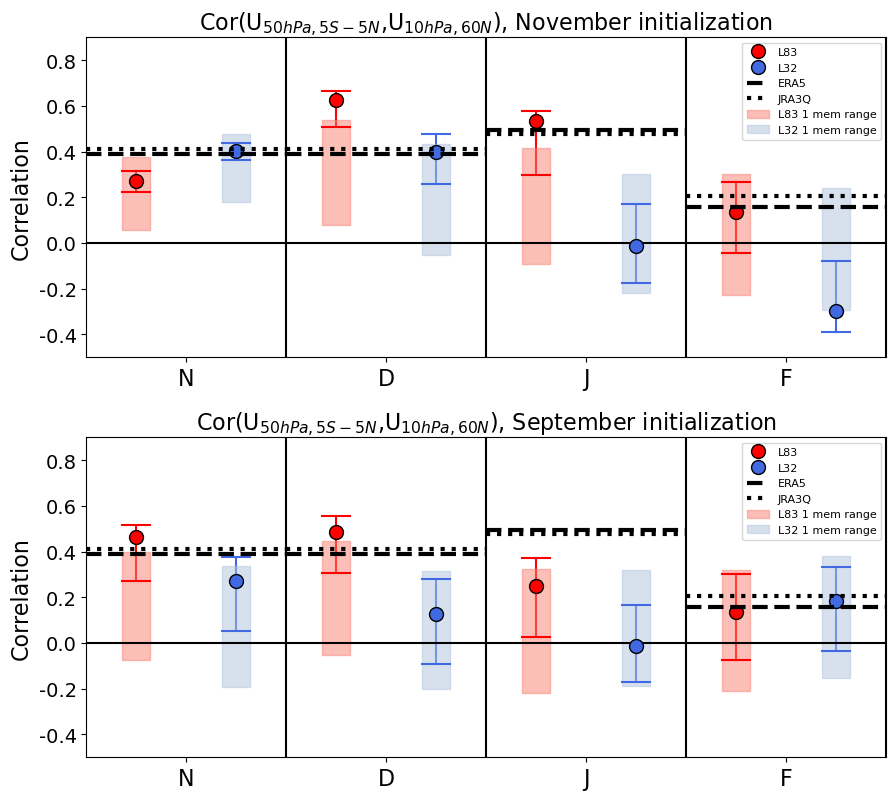

In [12]:
fig = plt.figure(figsize=(16,16))

ax = fig.add_axes([0.05,0.7,0.5,0.2])
ax.set_ylim(-0.5,0.9)
ax.set_xlim(-0.5,3.5)
ax.plot([-0.5,3.5],[0,0], color='black')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['N','D','J','F'], fontsize=16)
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8])
ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8'], fontsize=14)
ax.set_ylabel('Correlation', fontsize=16)
ax.set_title('Cor(U$_{50hPa,5S-5N}$,U$_{10hPa, 60N}$), November initialization', fontsize=16)

monplot=[11,12,1,2]
for imon in np.arange(0,len(monplot),1):
    ax.plot(imon-0.25, high_nov_cor.sel(month=monplot[imon]),"o", markerfacecolor='red', markeredgecolor='black', markersize=10, 
           label='L83' if imon == 0 else '')
    ax.plot([imon-0.25,imon-0.25],[min95_nov_high_em.sel(month=monplot[imon]),max95_nov_high_em.sel(month=monplot[imon])], color='red', zorder=0)
    ax.plot([imon-0.25-0.07,imon-0.25+0.07],[min95_nov_high_em.sel(month=monplot[imon]),min95_nov_high_em.sel(month=monplot[imon])], color='red')
    ax.plot([imon-0.25-0.07,imon-0.25+0.07],[max95_nov_high_em.sel(month=monplot[imon]),max95_nov_high_em.sel(month=monplot[imon])], color='red')
    
    
    ax.plot(imon+0.25, low_nov_cor.sel(month=monplot[imon]),"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10,
           label='L32' if imon == 0 else '')
    ax.plot([imon+0.25,imon+0.25],[min95_nov_low_em.sel(month=monplot[imon]),max95_nov_low_em.sel(month=monplot[imon])], color='royalblue', zorder=0)
    ax.plot([imon+0.25-0.07,imon+0.25+0.07],[min95_nov_low_em.sel(month=monplot[imon]),min95_nov_low_em.sel(month=monplot[imon])], color='royalblue')
    ax.plot([imon+0.25-0.07,imon+0.25+0.07],[max95_nov_low_em.sel(month=monplot[imon]),max95_nov_low_em.sel(month=monplot[imon])], color='royalblue')

    
    
    ax.plot([imon-0.5,imon+0.5], [era5_nov_cor.sel(month=monplot[imon]), era5_nov_cor.sel(month=monplot[imon])], color='black',
           linewidth=3, linestyle='dashed', label='ERA5' if imon == 0 else '')
    ax.plot([imon-0.5,imon+0.5], [jra_nov_cor.sel(month=monplot[imon]), jra_nov_cor.sel(month=monplot[imon])], color='black',
           linewidth=3, linestyle='dotted', label='JRA3Q' if imon == 0 else '')
    ax.plot([imon+0.5,imon+0.5],[-0.5,1], color='black')
    
    ax.fill_between([imon-0.25-0.07,imon-0.25+0.07],[min95_nov_high_1mem.sel(month=monplot[imon]), min95_nov_high_1mem.sel(month=monplot[imon])],
                    [max95_nov_high_1mem.sel(month=monplot[imon]), max95_nov_high_1mem.sel(month=monplot[imon])], color='salmon', alpha=0.5,
                   label='L83 1 mem range' if imon == 0 else '')
    
    ax.fill_between([imon+0.25-0.07,imon+0.25+0.07],[min95_nov_low_1mem.sel(month=monplot[imon]), min95_nov_low_1mem.sel(month=monplot[imon])],
                    [max95_nov_low_1mem.sel(month=monplot[imon]), max95_nov_low_1mem.sel(month=monplot[imon])], color='lightsteelblue', alpha=0.5,
                   label='L32 1 mem range' if imon == 0 else '')
    
    ax.legend(loc='upper right', fontsize=8)
    

ax = fig.add_axes([0.05,0.45,0.5,0.2])
ax.set_ylim(-0.5,0.9)
ax.set_xlim(-0.5,3.5)
ax.plot([-0.5,3.5],[0,0], color='black')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['N','D','J','F'], fontsize=16)
ax.set_yticks([-0.4,-0.2,0,0.2,0.4,0.6,0.8])
ax.set_yticklabels(['-0.4','-0.2','0.0','0.2','0.4','0.6','0.8'], fontsize=14)
ax.set_ylabel('Correlation', fontsize=16)
ax.set_title('Cor(U$_{50hPa,5S-5N}$,U$_{10hPa, 60N}$), September initialization', fontsize=16)

monplot=[11,12,1,2]
for imon in np.arange(0,len(monplot),1):
    ax.plot(imon-0.25, high_sep_cor.sel(month=monplot[imon]),"o", markerfacecolor='red', markeredgecolor='black', markersize=10, 
           label='L83' if imon == 0 else '')
    ax.plot([imon-0.25,imon-0.25],[min95_sep_high_em.sel(month=monplot[imon]),max95_sep_high_em.sel(month=monplot[imon])], color='red', zorder=0)
    ax.plot([imon-0.25-0.07,imon-0.25+0.07],[min95_sep_high_em.sel(month=monplot[imon]),min95_sep_high_em.sel(month=monplot[imon])], color='red')
    ax.plot([imon-0.25-0.07,imon-0.25+0.07],[max95_sep_high_em.sel(month=monplot[imon]),max95_sep_high_em.sel(month=monplot[imon])], color='red')

    
    ax.plot(imon+0.25, low_sep_cor.sel(month=monplot[imon]),"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10,
           label='L32' if imon == 0 else '')
    ax.plot([imon+0.25,imon+0.25],[min95_sep_low_em.sel(month=monplot[imon]),max95_sep_low_em.sel(month=monplot[imon])], color='royalblue', zorder=0)
    ax.plot([imon+0.25-0.07,imon+0.25+0.07],[min95_sep_low_em.sel(month=monplot[imon]),min95_sep_low_em.sel(month=monplot[imon])], color='royalblue')
    ax.plot([imon+0.25-0.07,imon+0.25+0.07],[max95_sep_low_em.sel(month=monplot[imon]),max95_sep_low_em.sel(month=monplot[imon])], color='royalblue')
    
    
    ax.plot([imon-0.5,imon+0.5], [era5_sep_cor.sel(month=monplot[imon]), era5_sep_cor.sel(month=monplot[imon])], color='black',
           linewidth=3, linestyle='dashed', label='ERA5' if imon == 0 else '')
    ax.plot([imon-0.5,imon+0.5], [jra_sep_cor.sel(month=monplot[imon]), jra_sep_cor.sel(month=monplot[imon])], color='black',
           linewidth=3, linestyle='dotted', label='JRA3Q' if imon == 0 else '')
    ax.plot([imon+0.5,imon+0.5],[-0.5,1], color='black')
    
    ax.fill_between([imon-0.25-0.07,imon-0.25+0.07],[min95_sep_high_1mem.sel(month=monplot[imon]), min95_sep_high_1mem.sel(month=monplot[imon])],
                    [max95_sep_high_1mem.sel(month=monplot[imon]), max95_sep_high_1mem.sel(month=monplot[imon])], color='salmon', alpha=0.5,
                   label='L83 1 mem range' if imon == 0 else '')
    
    ax.fill_between([imon+0.25-0.07,imon+0.25+0.07],[min95_sep_low_1mem.sel(month=monplot[imon]), min95_sep_low_1mem.sel(month=monplot[imon])],
                    [max95_sep_low_1mem.sel(month=monplot[imon]), max95_sep_low_1mem.sel(month=monplot[imon])], color='lightsteelblue', alpha=0.5,
                   label='L32 1 mem range' if imon == 0 else '')
    
    
    ax.legend(loc='upper right', fontsize=8)
    
fig.savefig(plotpath+'fig6.png', bbox_inches='tight', facecolor='white')